# ExoPredict-Data Analysis

# Pre-Processing


In [1]:
import os
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q http://apache.osuosl.org/spark/spark-3.5.4/spark-3.5.4-bin-hadoop3.tgz
!tar xf spark-3.5.4-bin-hadoop3.tgz
!pip install -q findspark
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.5.4-bin-hadoop3"

In [2]:
# Import findspark and initialise.
import findspark
findspark.init()

In [46]:
# Upload the Clened Dataset file from output
from google.colab import files
uploaded = files.upload()

Saving Cleaned Dataset.csv to Cleaned Dataset (2).csv


In [47]:
# Import packages
from pyspark.sql import SparkSession
import time

# Create a SparkSession
spark = SparkSession.builder.appName("ExoPlanet_ETL_Project").getOrCreate()

In [48]:
# Read the file
file_path = "Cleaned Dataset.csv"

df = spark.read.option("header", "true").option("inferSchema", "true").csv(file_path)
df.show(5)

+---------------+-------------+-----------+----------------+--------------+--------------------+--------------------+-------------------+--------------------------+--------------------------+------------------+-------------------+-------+-----------------+---------+------------+--------------------+--------+-----------------------+--------+--------+---------+--------+--------------------+-----------+------------------+------------+------------+----------+-----------------+---------------+----------------+--------------------+--------------------+------------+-----------+-----------+------------------+-----------------------+-------------------------+--------------+--------------------+--------------------+----------------------+------------------------+
|    Planet_Name|    Host_Star|Num_Planets|Discovery_Method|Discovery_Year|  Discovery_Facility|      Reference_Name|Orbital_Period_Days|Orbital_Period_Error_Upper|Orbital_Period_Error_Lower|Semi_Major_Axis_AU|Planet_Radius_Earth|pl_rad

#### Data Analysis
 1. How do planetary characteristics influence the likelihood of being in the habitable zone? (Mandeep)

 2. How does a planet’s orbit impact its temperature and potential habitability?(Mandeep)

In [49]:
# Import necessary libraries
from pyspark.sql.types import IntegerType, DoubleType, DateType
from pyspark.sql.functions import col, isnan, when, count, monotonically_increasing_id
from pyspark.ml.feature import VectorAssembler, StandardScaler, StringIndexer
from pyspark.ml.clustering import KMeans
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

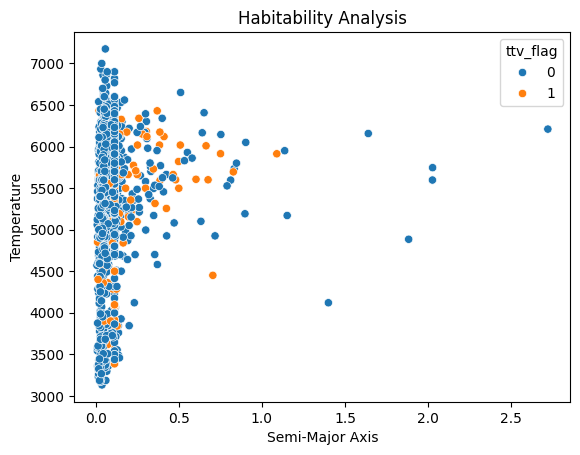

In [50]:
# Habitability Analysis based upon temperature
df_habitable = df.select('Semi_Major_Axis_AU','Star_Temperature_K', 'ttv_flag')

#Convert to Pandas for Visualisation
df_habitable_pd = df_habitable.toPandas()

sns.scatterplot(data=df_habitable_pd, x= 'Semi_Major_Axis_AU', y='Star_Temperature_K', hue='ttv_flag')
plt.xlabel("Semi-Major Axis")
plt.ylabel("Temperature")
plt.title("Habitability Analysis")
plt.savefig("habitability_analysis.png")
plt.show()

#Save the Results
df_habitable_pd.to_csv("habitability_analysis.csv", index=False)

In [51]:
# Check and update the datatype for SQL Loading process
df_habitable_pd.dtypes

,0
Semi_Major_Axis_AU,float64
Star_Temperature_K,float64
ttv_flag,int32


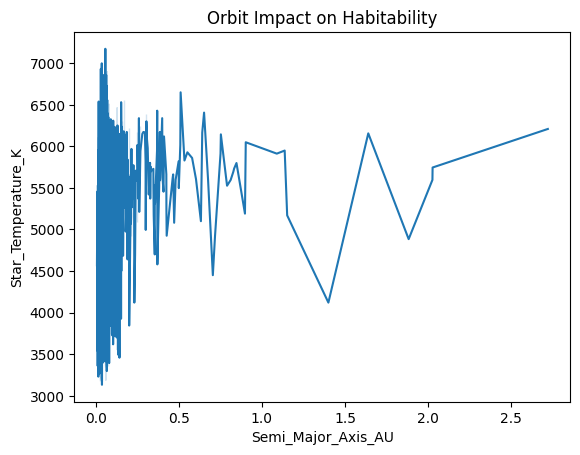

In [52]:
# Orbit Impact on Habitability ---
df_orbit = df.select('Semi_Major_Axis_AU', 'Star_Temperature_K')


#Convert to Pandas for Visualisation
df_orbit_pd = df_orbit.toPandas()

sns.lineplot(data=df_orbit_pd, x='Semi_Major_Axis_AU', y='Star_Temperature_K')
plt.xlabel('Semi_Major_Axis_AU')
plt.ylabel('Star_Temperature_K')
plt.title("Orbit Impact on Habitability")
plt.savefig("orbit_temperature_analysis.png")
plt.show()

#Save the Results
df_orbit_pd.to_csv("orbit_temperature_analysis.csv", index=False)

In [42]:
df_orbit_pd.dtypes

,0
Semi_Major_Axis_AU,float64
Star_Temperature_K,float64


Q1 & Q2: Classify planets by insolation, temperature, mass, coordinates with regards of available planets (Iarsolav)
Complete dataset, it'll be helpful to draw graphics with stars located across sphere (Iarsolav)

In [ ]:
# # --- Question 3 & 4: Classification by Insolation, Temperature, Mass, Coordinates ---
# df_class2 = df.select('Insolation_Flux', 'temperature', 'mass', 'ra', 'dec')

# #Convert to Pandas for Visualisation
# df_class2_pd = df_class2.toPandas()
# sns.pairplot(df_class2_pd)
# plt.savefig("classification_insolation_temp_mass_coordinates.png")
# plt.show()

# #Save the Results
# df_class2.toPandas().to_csv("classification_insolation_temp_mass_coordinates.csv", index=False)

In [ ]:
#Export CSV and visualisations

# Patrick
Question 1: Can we identify groups of similar exoplanets?
Analysis: Apply clustering algorithms (e.g., K-means, hierarchical clustering) to group planets with similar characteristics.
Question 2: Can we classify planets into different categories (e.g., rocky planets, gas giants) based on their properties?
Analysis: Use supervised learning algorithms to classify planets based on features such as mass, radius, and temperature.

In [ ]:
# # --- Question 1: Clustering Exoplanets ---
# df = df.withColumnRenamed("Planet_Radius_Earth", "radius").withColumnRenamed("Planet_Mass_Earth", "mass").withColumnRenamed("Equilibrium_Temperature", "temperature").withColumnRenamed("Semi_Major_Axis_AU", "semi_major_axis")

# features = ['radius', 'mass', 'temperature', 'semi_major_axis']
# vector_assembler = VectorAssembler(inputCols=features, outputCol='features')
# df_features = vector_assembler.transform(df)

# scaler = StandardScaler(inputCol="features", outputCol="scaledFeatures")
# df_scaled = scaler.fit(df_features).transform(df_features)

# kmeans = KMeans(featuresCol='scaledFeatures', k=3, seed=42)
# kmeans_model = kmeans.fit(df_scaled)
# df_clusters = kmeans_model.transform(df_scaled)
# df_clusters.select('Planet_Name', 'prediction').show(10)

# # Convert to pandas for visualisation
# df_clusters_pd = df_clusters.toPandas()
# sns.scatterplot(data=df_clusters_pd, x=df_clusters_pd['radius'], y=df_clusters_pd['mass'], hue=df_clusters_pd['prediction'])
# plt.savefig("clustering_visualization.png")
# plt.show()

# # Save the results
# df_clusters.toPandas().to_csv("clustering_results.csv", index=False)

In [ ]:
# # --- Question 2: Classification of Planets ---
# df_class = df.select('radius', 'mass', 'temperature', 'Discovery_Method')

# # Convert string column to numeric
# indexer = StringIndexer(inputCol="Discovery_Method", outputCol="Discovery_Method_Index")
# df_class = indexer.fit(df_class).transform(df_class)

# vector_assembler_class = VectorAssembler(inputCols=['radius', 'mass', 'temperature'], outputCol='features')
# df_class_features = vector_assembler_class.transform(df_class)

# rf = RandomForestClassifier(labelCol='Discovery_Method_Index', featuresCol='features', numTrees=10)
# rf_model = rf.fit(df_class_features)
# df_pred = rf_model.transform(df_class_features)

# evaluator = MulticlassClassificationEvaluator(labelCol="Discovery_Method_Index", predictionCol="prediction", metricName="accuracy")
# accuracy = evaluator.evaluate(df_pred)
# print(f"Classification Accuracy: {accuracy}")


# #Convert to Pandas for Visualisation
# df_pred_pd = df_pred.select("Discovery_Method_Index", "prediction").toPandas()
# sns.histplot(data=df_pred_pd, x='prediction', kde=True)
# plt.xlabel("Predicted Class")
# plt.ylabel("Frequency")
# plt.title("Distribution of Predicted Planet Types")
# plt.savefig("classification_visualization.png")
# plt.show()


# # Save classification results
# df_pred.toPandas().to_csv("classification_results.csv", index=False)

In [ ]:
#Export CSV and visualisations

# Amrit
#### Question
Which exoplanet discovery method has been used the most, and which has been used the least? What does this indicate about the effectiveness and prevalence of different detection techniques?


In [53]:
clean_df = df.cache()

In [54]:
# Check the cached dataframe
clean_df.show(2)

+---------------+-------------+-----------+----------------+--------------+--------------------+--------------------+-------------------+--------------------------+--------------------------+------------------+-------------------+-------+-----------------+---------+------------+--------------------+--------+-----------------------+--------+--------+---------+--------+--------------------+-----------+------------------+------------+------------+----------+-----------------+---------------+----------------+--------------------+--------------------+------------+-----------+----------+------------------+-----------------------+-------------------------+--------------+--------------------+--------------------+----------------------+------------------------+
|    Planet_Name|    Host_Star|Num_Planets|Discovery_Method|Discovery_Year|  Discovery_Facility|      Reference_Name|Orbital_Period_Days|Orbital_Period_Error_Upper|Orbital_Period_Error_Lower|Semi_Major_Axis_AU|Planet_Radius_Earth|pl_radj

In [88]:
# Assuming clean_df is your PySpark DataFrame
clean_df_1 = clean_df.select("Discovery_Method", "Discovery_Facility", "Host_Star", "Discovery_Year")

# Convert PySpark DataFrame to Pandas
pandas_df = clean_df_1.toPandas()

pandas_df.head(2)

,Discovery_Method,Discovery_Facility,Host_Star,Discovery_Year
0,Transit,Kepler,Kepler-138,2014
1,Transit,Transiting Exoplanet Survey Satellite (TESS),TIC 139270665,2024


In [89]:
# Find the most used discovery method
disc_method_max = pandas_df["Discovery_Method"].value_counts().idxmax()

# Find the least used discovery method
disc_method_min = pandas_df["Discovery_Method"].value_counts().idxmin()

# Count the total number of discoveries using the 'Transit' method
length_max = (pandas_df["Discovery_Method"] == "Transit").sum()

# Count the total number of discoveries using the 'Transit Timing Variations' method
length_min = (pandas_df["Discovery_Method"] == "Transit Timing Variations").sum()

print("Most used discovery method:", disc_method_max)
print("Least used discovery method:", disc_method_min)
print("Total number of discoveries using Transit method:",length_max)
print("Total number of discoveries using Transit Timing Variations:", length_min)

Most used discovery method: Transit
Least used discovery method: Transit Timing Variations
Total number of discoveries using Transit method: 1102
Total number of discoveries using Transit Timing Variations: 1


In [90]:
# Check the datatype
pandas_df.dtypes

,0
Discovery_Method,object
Discovery_Facility,object
Host_Star,object
Discovery_Year,int32


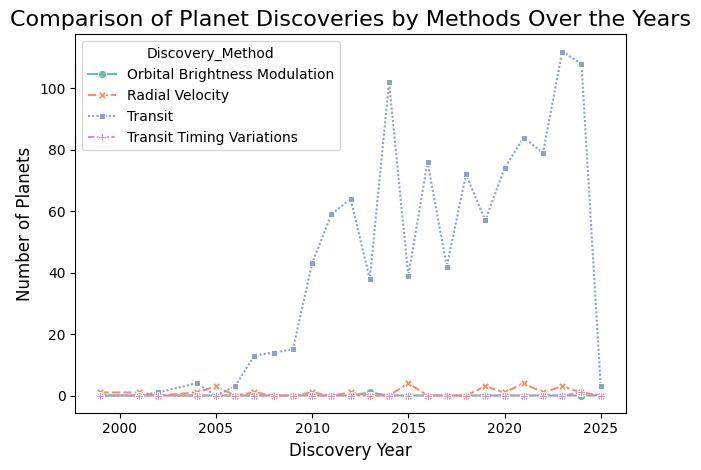

In [91]:
# Save the Pandas DataFrame to a CSV file
pandas_df.to_csv("discovery_methods.csv", index=False)

# Count the number of planets discovered per year for each method
planet_counts = pandas_df.groupby(['Discovery_Year', 'Discovery_Method']).size().unstack(fill_value=0)

# Create a line plot comparing the four methods
plt.figure()
sns.lineplot(data=planet_counts, palette="Set2", markers=True)

# Set labels and title
plt.title("Comparison of Planet Discoveries by Methods Over the Years", fontsize=16)
plt.xlabel("Discovery Year", fontsize=12)
plt.ylabel("Number of Planets", fontsize=12)

# Save the plot as a PNG file
plt.tight_layout()
plt.savefig("discovery_methods_comparison_line_graph.png")

# Show the plot
plt.show()


#### Answer
 Transit is the most dominant method for discovering exoplanets, while Transit Timing Variations (TTV) is the least used.

- Transit (1102 discoveries) → Most widely used method, likely due to missions like Kepler and TESS, which monitor star brightness dips when planets pass in front.
- Transit Timing Variations (1 discovery) → Rarely used, likely because it requires detecting minute gravitational influences on already-known planets.

This analysis highlights the dominance of large-scale transit surveys and the rarity of more specialized detection techniques like TTV

#### Question 8
How does the distance of a planet host from its exoplanets influence the exoplanets' temperature, luminosity?

In [92]:
clean_df.show(2)

+---------------+-------------+-----------+----------------+--------------+--------------------+--------------------+-------------------+--------------------------+--------------------------+------------------+-------------------+-------+-----------------+---------+------------+--------------------+--------+-----------------------+--------+--------+---------+--------+--------------------+-----------+------------------+------------+------------+----------+-----------------+---------------+----------------+--------------------+--------------------+------------+-----------+----------+------------------+-----------------------+-------------------------+--------------+--------------------+--------------------+----------------------+------------------------+
|    Planet_Name|    Host_Star|Num_Planets|Discovery_Method|Discovery_Year|  Discovery_Facility|      Reference_Name|Orbital_Period_Days|Orbital_Period_Error_Upper|Orbital_Period_Error_Lower|Semi_Major_Axis_AU|Planet_Radius_Earth|pl_radj

In [66]:
# Create a temporary view of the dataframe
clean_df.createOrReplaceTempView('discovery_method')

In [76]:
result_2 = spark.sql("""
    SELECT Planet_Name, System_Distance_PC, Star_Temperature_K, System_Infrared_Magnitude
    FROM discovery_method
""")
result_2.show(2)

+---------------+------------------+------------------+-------------------------+
|    Planet_Name|System_Distance_PC|Star_Temperature_K|System_Infrared_Magnitude|
+---------------+------------------+------------------+-------------------------+
|   Kepler-138 c|           66.8624|            3841.0|                    9.506|
|TIC 139270665 b|           189.875|            5844.0|                    8.946|
+---------------+------------------+------------------+-------------------------+
only showing top 2 rows



In [77]:
# Convert the PySpark DataFrame to a Pandas DataFrame
pandas_df_1 = result_2.toPandas()

In [78]:
# Find the maximum and minimum system distances
max_dist = pandas_df_1["System_Distance_PC"].max()
min_dist = pandas_df_1["System_Distance_PC"].min()

# Find the planet name and star temperature corresponding to max and min distances
planet_max_dist = pandas_df_1.loc[pandas_df_1["System_Distance_PC"] == max_dist, ["Planet_Name", "Star_Temperature_K"]].values[0]
planet_min_dist = pandas_df_1.loc[pandas_df_1["System_Distance_PC"] == min_dist, ["Planet_Name", "Star_Temperature_K"]].values[0]

print("Planet with maximum distance:", planet_max_dist[0], "| Distance:", max_dist, "| Star Temperature:", planet_max_dist[1])
print("Planet with minimum distance:", planet_min_dist[0], "| Distance:", min_dist, "| Star Temperature:", planet_min_dist[1])



Planet with maximum distance: OGLE-TR-182 b | Distance: 2501.75 | Star Temperature: 5924.0
Planet with minimum distance: HD 219134 b | Distance: 6.53127 | Star Temperature: 4699.0


In [86]:
# Check the datatype
pandas_df_1.dtypes

,0
Planet_Name,object
System_Distance_PC,float64
Star_Temperature_K,float64
System_Infrared_Magnitude,float64


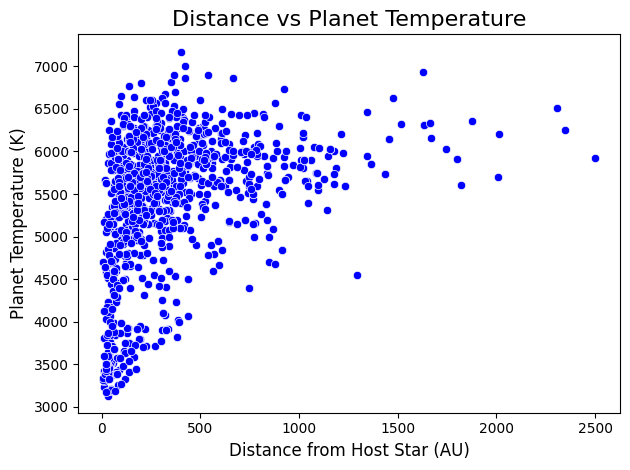

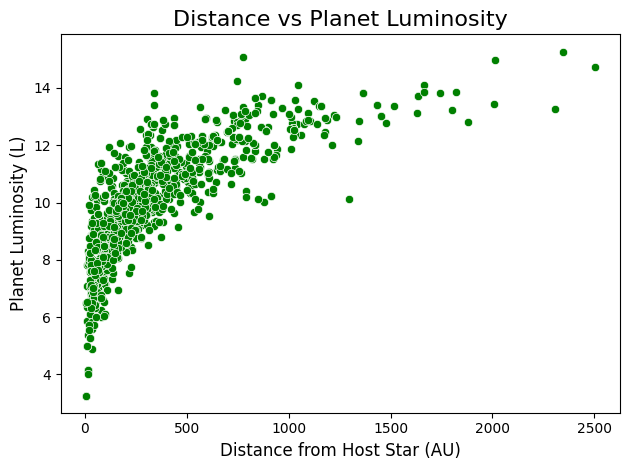

In [85]:
# Save the Pandas DataFrame to a CSV file
pandas_df_1.to_csv("planet_data_with_distance.csv", index=False)

# 1. Scatter plot for Distance vs Temperature
plt.figure()
sns.scatterplot(x='System_Distance_PC', y='Star_Temperature_K', data=pandas_df, color='blue')
plt.title("Distance vs Planet Temperature", fontsize=16)
plt.xlabel("Distance from Host Star (AU)", fontsize=12)
plt.ylabel("Planet Temperature (K)", fontsize=12)
plt.tight_layout()
plt.savefig("distance_vs_temperature.png")
plt.show()

# 2. Scatter plot for Distance vs Luminosity
plt.figure()
sns.scatterplot(x='System_Distance_PC', y='System_Infrared_Magnitude', data=pandas_df, color='green')
plt.title("Distance vs Planet Luminosity", fontsize=16)
plt.xlabel("Distance from Host Star (AU)", fontsize=12)
plt.ylabel("Planet Luminosity (L)", fontsize=12)
plt.tight_layout()
plt.savefig("distance_vs_luminosity.png")
plt.show()

